# De hautes espérances

Un exercice au long cours qui vous permettra de revoir, en plus des bonnes pratiques générales déjà acquises, certaines des structures fondamentales du langage Python.

L’objectif est d’afficher un diagramme permettant de comparer les distances de plusieurs randonnées, calculées d’après la pente moyenne et la dénivelée positive depuis leur point de départ.

## Première étape : ébauche du programme

Préparez dans un premier temps le squelette de votre programme : *shebang*, fonction `main()`, procédure principale… N’hésitez pas à lui attribuer les droits en exécution et testez son bon fonctionnement.

## Seconde étape : lire depuis un fichier

Dans le répertoire *data* vous trouverez un fichier intitulé [mountain_passes.tsv](../data/mountain_passes.tsv). Bien que portant une extension *.tsv*, il est au format CSV. Quelle est la différence ?

**CSV :** *Comma-Separated Values*  
**TSV :** *Tabulation-Separated Values*

CSV est la dénomination officielle pour tous les fichiers plats qui permettent de représenter un tableau de données en respectant la structure :

- un enregistrement par ligne ;
- chaque donnée séparée de la précédente par un caractère.

N’importe quel caractère peut être utilisé comme séparateur : le point-virgule, le tiret cadratin ou même une lettre ! La tabulation n’est qu’une possibilité parmi d’autres, mais une possibilité que l’on rencontre très fréquemment. Pour cette raison, elle dispose de sa propre extension *.tsv*, loin d’être officielle vu que l’on pourrait dénommer les fichiers avec l’extension *.csv* sans aucune perte de performance. Mieux encore, l’extension *.txt* est parfaitement convenable : les fichiers CSV ne sont au final que de très banals fichiers textes.

En résumé, le format CSV présente de nombreux avantages, parmi lesquels :

- un format plat, c’est-à-dire sans instruction de mise en forme (un caractère fait office de
séparateur entre les champs de données) ;
- une structure en lignes et en colonnes ;
- une interopérabilité maximale avec des logiciels spécialisés (*LibreOffice Calc*, *Numbers*, *Excel*…) comme des éditeurs de textes simples.

Même si Python parvient très bien à lire les fichiers CSV avec ses fonctions natives, il est préférable de faire appel à une bibliothèque logicielle spécialisée, opportunément nommée *csv*. Commencez par l’importer :

In [4]:
# your code here

import csv

Consultez [la documentation de la bibliothèque](https://docs.python.org/3.11/library/csv.html#csv.DictReader) et utilisez la méthode `.DictReader()` pour lire les données et les ajouter à une variable `data` en respectant les recommandations suivantes :

- la variable `data` sera de type `list` ;
- elle recueillera des objets de type `tuple`, composés de trois éléments :
    - une chaîne de caractères pour le nom du col ;
    - un entier de type `int` pour la dénivelée ;
    - et un dernier de type `float` pour la pente en pourcentage.

In [25]:
# your code here

with open('../data/mountain_passes.tsv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    data = [
        (line['pass'], int(line['drop']), float(line['slope']))
        for line in reader
    ]

## Troisième étape : un peu de trigonométrie

Définissez une fonction `distance()` qui accepte deux paramètres `alt` et `gradient` afin de calculer une distance. Il s’agit de l’application de fonctions de trigonométrie. Une façon de procéder consiste à :

1. calculer la tangente de l’angle `gradient` ;
2. calculer la longueur du côté adjacent en multipliant la tangente de `gradient` par le côté opposé `alt` ;
3. appliquer le théorème de pythagore.

In [47]:
# your code here

def distance(alt, gradient):
    """Calculates a distance based on the
    elevation and the gradient.

    Positional arguments:
    alt -- the elevation
    gradient -- the gradient
    """
    alpha = gradient / 100
    arc = math.atan(alpha)
    hypo = alt / math.sin(arc)

    return hypo

In [41]:
def mToKm(m):
    """Conversion: meters to kilometers
    
    m -- int: meters
    """
    return round(m / 1000, 2)

In [45]:

def main():
    """Main function"""
    with open('../data/mountain_passes.tsv', newline='') as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        data = [
            (line['pass'], int(line['drop']), float(line['slope']))
            for line in reader
        ]
    # Building the axis
    x, y = [], []

    # For each pass…
    for mnt_pass in data:
        # Informations
        name = mnt_pass[0]
        height = int(mnt_pass[1])
        slope = float(mnt_pass[2])
        # Calculates the distance
        meters = distance(height, slope)
        # Conversion in kms
        kms = mToKm(meters)
        # Data to graph
        x.append(name)
        y.append(kms)

    # Ploting the bars
    matplotlib.pyplot.bar(x, y)
    matplotlib.pyplot.ylabel('Distance de la rando (en km)')
    matplotlib.pyplot.show()

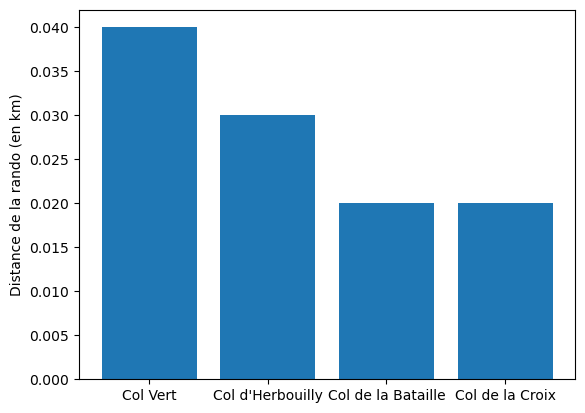

In [46]:
main()